In [2]:

users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
    {"id": 10, "name": "Jen"}
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]



In [3]:
for user in users:
    user['friends'] = []

In [4]:
for i, j in friendships:
    users[i]['friends'].append(users[j])
    users[j]['friends'].append(users[i])

In [5]:
def number_od_friends(user):
    return len(user['friends'])

In [6]:
total_connections = sum(number_od_friends(user) for user in users)

In [7]:
num_users = len(users)

In [8]:
avg_connections = total_connections / num_users

In [9]:
"""def friends_of_friend_ids_bad(user):
    return [foaf['id']
            for friend in user
            for foaf in friend['friends']]"""

"def friends_of_friend_ids_bad(user):\n    return [foaf['id']\n            for friend in user\n            for foaf in friend['friends']]"

In [10]:
num_friends_by_id = [((user['id']), number_od_friends(user)) for user in users]

In [11]:
num_friends_by_id.sort(key = lambda id_and_friend: id_and_friend[1], reverse=True)

In [12]:
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

In [13]:
def not_the_same(user, other_user):
    return user['id'] != other_user['id']

In [14]:
def not_friend(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user['friends'])

In [15]:
from collections import Counter


def friends_of_friend_ids(user):
    return Counter(foaf['id']
                   for friend in user['friends']
                   for foaf in friend['friends']
                   if not_the_same(user, foaf)
                   and not_friend(user, foaf))


In [16]:
for i in range(len(users)):
    print(friends_of_friend_ids(users[i]))

Counter({3: 2})
Counter({4: 1})
Counter({4: 1})
Counter({0: 2, 5: 1})
Counter({1: 1, 2: 1, 6: 1, 7: 1})
Counter({8: 2, 3: 1})
Counter({7: 2, 4: 1, 9: 1})
Counter({6: 2, 4: 1, 9: 1})
Counter({5: 2})
Counter({6: 1, 7: 1})
Counter()


In [17]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [18]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]


In [20]:
from collections import defaultdict

In [21]:
user_ids_by_iterest = defaultdict(list)

In [22]:
for user_id, interest in interests:
    user_ids_by_iterest[interest].append(user_id)

In [24]:
interests_by_user_id = defaultdict(list)

In [25]:
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [27]:
interests_by_user_id[0]

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']

In [30]:
user_ids_by_iterest['Big Data']

[0, 8, 9]

In [42]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
                   for interest in interests_by_user_id[user_id]
                   for interested_user_id in user_ids_by_iterest[interest]
                   if interested_user_id != user_id)


In [43]:
most_common_interests_with(0)

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [45]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]


In [46]:
import matplotlib.pyplot as plt

In [47]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in  salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel('Lata_pracy')
    plt.ylabel('Zarobki')
    plt.show()

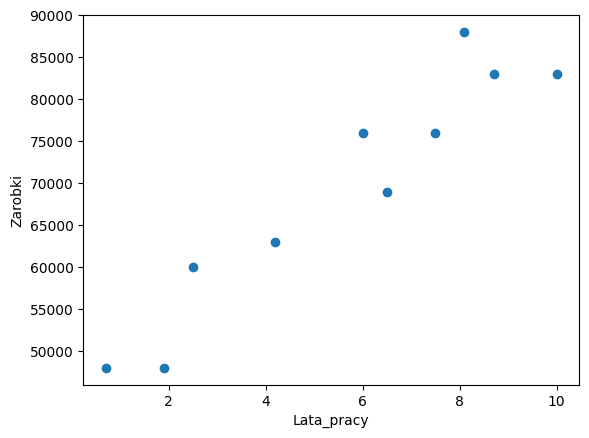

In [48]:
make_chart_salaries_by_tenure()

In [49]:
salary_by_tenure = defaultdict(list)

In [55]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [56]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [58]:
average_salary_by_tenure = {tenure: sum(salaries) / len(salaries)
                            for tenure, salaries in salary_by_tenure.items()}


In [59]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [60]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'mniej niz dwa'
    elif tenure < 5:
        return 'pomiedzy dwa i pięć'
    else:
        return 'powyżej pięciu'

In [61]:
salary_by_tenure_bucket = defaultdict(list)

In [66]:
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)